# Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [5]:
# connect ke drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np  # Mengimpor library NumPy untuk manipulasi data numerik.
from sklearn.pipeline import make_pipeline  # Mengimpor make_pipeline untuk membuat pipeline pemrosesan data.
from sklearn.preprocessing import MinMaxScaler  # Mengimpor MinMaxScaler untuk penskalaan data.
from sklearn import datasets  # Mengimpor datasets dari Scikit-Learn untuk mengakses dataset bawaan.
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split untuk membagi data menjadi data latih dan data uji.
import matplotlib.pyplot as plt  # Mengimpor matplotlib.pyplot untuk visualisasi data.
from sklearn.svm import SVC  # Mengimpor Support Vector Classifier (SVC) dari Scikit-Learn.
from sklearn.decomposition import PCA as RandomizedPCA  # Mengimpor Principal Component Analysis (PCA) dari Scikit-Learn dengan alias RandomizedPCA.
from sklearn.naive_bayes import GaussianNB  # Mengimpor Naive Bayes classifier dari Scikit-Learn.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Mengimpor metrik evaluasi klasifikasi.
from sklearn.datasets import fetch_openml  # Mengimpor fetch_openml dari Scikit-Learn untuk mengakses dataset dari OpenML.

In [21]:
# Mengambil dataset MNIST dari OpenML menggunakan datasets.fetch_openml()
mnist = datasets.fetch_openml("mnist_784")

# Menampilkan jumlah sampel atau data points dalam dataset MNIST
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points

# Menampilkan dimensi dari setiap sampel dalam dataset MNIST
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel

# Menampilkan jumlah kelas yang ada dalam dataset MNIST dengan menghitung jumlah nilai unik pada target
print("Jumlah kelas:", len(mnist.target.unique()))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


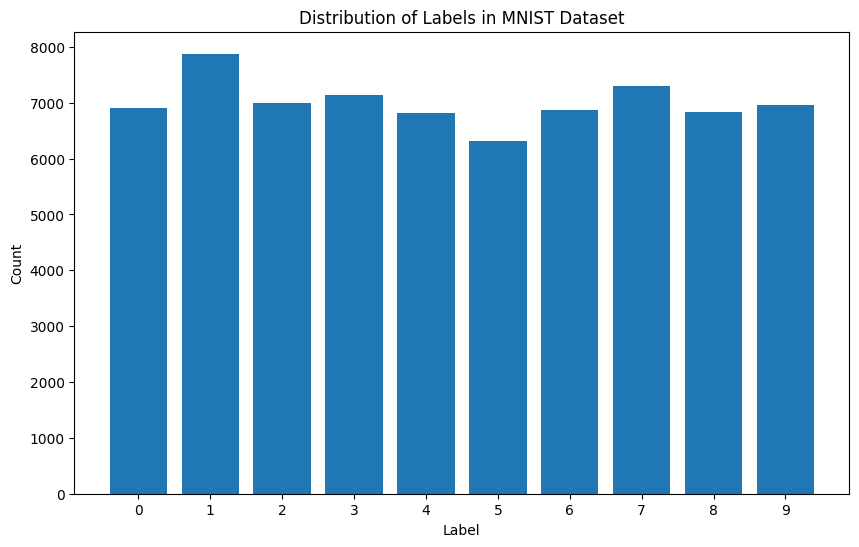

In [22]:
# Eksplorasi Dataset

# Menghitung jumlah masing-masing label dalam dataset MNIST
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

# Membuat visualisasi distribusi label dalam dataset MNIST menggunakan diagram batang
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Menambahkan label pada sumbu x dan y serta judul pada plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Menampilkan plot
plt.show()

In [24]:
# Mengonversi data MNIST ke tipe data float32
X = mnist.data.astype('float32')

# Mengonversi target MNIST ke tipe data integer (int)
y = mnist.target.astype('int')

# Menampilkan dimensi dari data X
X.shape

(70000, 784)

In [25]:
# Membuat objek MinMaxScaler untuk melakukan penskalaan data
scalling = MinMaxScaler()

# Melakukan penskalaan data pada X menggunakan MinMaxScaler
X_scalling = scalling.fit_transform(X)

# Menampilkan lima baris pertama dari data yang telah discaling
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
# Ekstraksi Fitur PCA

# Mengimpor modul GridSearchCV dari library Scikit-Learn untuk pencarian hiperparameter
from sklearn.model_selection import GridSearchCV

# Menentukan jumlah komponen utama (principal components) yang akan digunakan dalam PCA
n_components = 200

# Membuat objek PCA (Principal Component Analysis) dengan parameter yang telah ditentukan
pca = RandomizedPCA(n_components=n_components, whiten=True, random_state=42)

# Melakukan PCA (reduksi dimensi) pada data yang telah discaling (X_scalling)
X_pca = pca.fit_transform(X_scalling)

# Memisahkan data menjadi data latih dan data uji menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [28]:
# Flattening

# Mengubah bentuk (reshape) data X_pca menjadi bentuk yang datar (flattened)
X_flattened = X_pca.reshape(X_pca.shape[0], -1)

In [29]:
# Buat Model ANN

import tensorflow as tf
from tensorflow import keras

In [30]:
# Membuat objek model Sequential, yang merupakan kerangka dasar untuk membangun model neural network
model = keras.Sequential([
    # Input layer dengan Flatten untuk mengubah data menjadi vektor datar dengan panjang n_components
    keras.layers.Flatten(input_shape=(n_components,)),

    # Hidden layer pertama dengan 128 neuron dan fungsi aktivasi ReLU
    keras.layers.Dense(128, activation='relu'),

    # Hidden layer kedua dengan 64 neuron dan fungsi aktivasi ReLU
    keras.layers.Dense(64, activation='relu'),

    # Output layer dengan 10 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
    keras.layers.Dense(10, activation='softmax')
])

# Menampilkan ringkasan model, termasuk informasi tentang setiap lapisan
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               25728     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 34634 (135.29 KB)
Trainable params: 34634 (135.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Training Model

# Mengompilasi model neural network dengan pengaturan optimizer, loss function, dan metrik evaluasi
model.compile(optimizer='adam',  # Menggunakan optimizer Adam untuk optimisasi
              loss='sparse_categorical_crossentropy',  # Menggunakan loss function sparse_categorical_crossentropy untuk masalah klasifikasi
              metrics=['accuracy'])  # Menyertakan metrik akurasi sebagai metrik evaluasi

In [32]:
# Melatih model neural network menggunakan data latih (X_train dan y_train)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
700/700 [==============================] - 5s 5ms/step - loss: 0.5772 - accuracy: 0.8267 - val_loss: 0.2482 - val_accuracy: 0.9265
Epoch 2/20
700/700 [==============================] - 2s 4ms/step - loss: 0.1733 - accuracy: 0.9499 - val_loss: 0.1940 - val_accuracy: 0.9430
Epoch 3/20
700/700 [==============================] - 2s 3ms/step - loss: 0.1044 - accuracy: 0.9694 - val_loss: 0.1756 - val_accuracy: 0.9479
Epoch 4/20
700/700 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9805 - val_loss: 0.1722 - val_accuracy: 0.9509
Epoch 5/20
700/700 [==============================] - 3s 5ms/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 0.1865 - val_accuracy: 0.9489
Epoch 6/20
700/700 [==============================] - 3s 4ms/step - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.1955 - val_accuracy: 0.9496
Epoch 7/20
700/700 [==============================] - 3s 4ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.2068 - val_accuracy: 0.9475
Epoch 

In [33]:
# Menggunakan model untuk mengevaluasi data uji (X_test dan y_test)
test_loss, test_acc = model.evaluate(X_test, y_test)

# Menampilkan akurasi pada data uji
print(f"Akurasi data uji: {test_acc:.2f}")

# Menggunakan model untuk mengevaluasi data uji (X_test dan y_test)
test_loss, test_acc = model.evaluate(X_test, y_test)

# Menampilkan akurasi pada data uji
print(f"Akurasi data uji: {test_acc:.2f}")

438/438 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.9558
Akurasi data uji: 0.96
438/438 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.9558
Akurasi data uji: 0.96


In [34]:
# Melakukan prediksi dengan model pada data uji (X_test)
predict = model.predict(X_test)

# Mengambil label prediksi dengan nilai terbesar (argmax) dari setiap hasil prediksi
prediction_labels = np.argmax(predict, axis=1)

# Membangun matriks kebingungan (confusion matrix) dengan membandingkan label aktual (y_test) dan label prediksi
confusion = confusion_matrix(y_test, prediction_labels)

# Menampilkan matriks kebingungan
print("Confusion Matrix")
print(confusion)

438/438 [==============================] - 3s 7ms/step
Confusion Matrix
[[1305    0    7    1    0    3   11    5    9    2]
 [   1 1575    8    3    2    0    1    6    4    0]
 [   6    5 1323    4    9    3    5   13   10    2]
 [   3    2   18 1356    2   14    0   11   17   10]
 [   0    0    9    0 1260    1    3    0    2   20]
 [   2    2    5   35    3 1181   13    1   21   10]
 [   6    4    6    0   14    8 1346    1   10    1]
 [   2    2   14    6   12    0    0 1443    3   21]
 [   6    7   18   19    4    6    7    7 1275    8]
 [   4    5    1    9   44    7    1   20   12 1317]]
